# Taller 1
## Diferencias finitas con paso

Resolver la ecuación diferencial:

$
\frac{dy}{dt} = e^t
$

Con la condición inicial:

$
y(0) = 1
$

En el intervalo:

$
0 \leq t \leq 4
$

Con un paso:

$
dt = 0.2
$

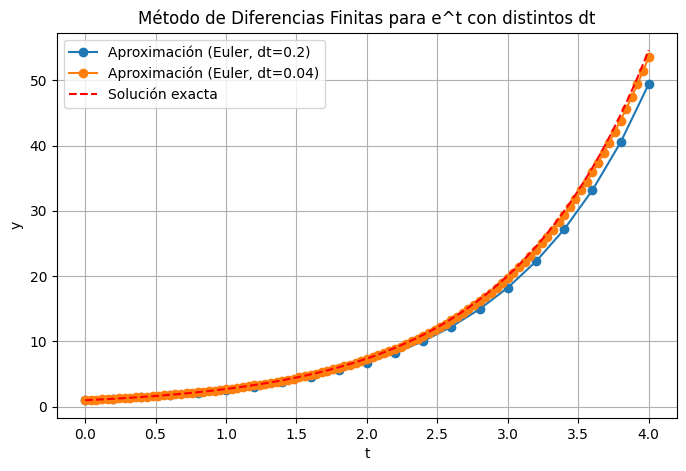

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros
dt_values = [0.2, 0.04]  # Diferentes pasos temporales
t_max = 4  # Tiempo máximo

plt.figure(figsize=(8, 5))

for dt in dt_values:
    t_values = np.arange(0, t_max + dt, dt)  # Valores de t
    
    # Inicializar solución
    y_values = np.zeros(len(t_values))
    y_values[0] = 1  # Condición inicial: y(0) = 1
    
    # Implementar el método de Diferencias Finitas
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + dt * np.exp(t_values[i-1])
    
    # Graficar la aproximación
    plt.plot(t_values, y_values, marker='o', linestyle='-', label=f'Aproximación (Diferencias Finitas, dt={dt})')

# Solución exacta para comparar
t_exact = np.arange(0, t_max + 0.01, 0.01)
y_exact = np.exp(t_exact)
plt.plot(t_exact, y_exact, 'r--', label='Solución exacta')

plt.xlabel('t')
plt.ylabel('y')
plt.title('Método de Diferencias Finitas para e^t con distintos dt')
plt.legend()
plt.grid()
plt.show()

## Diferencias finitas con condiciones de frontera

Ecuación de segundo grado: 
$
\frac{d^2y}{dt^2} = 5
$

Con las condiciones de frontera: 
$
y(0) = 1, y(1) = 2
$

Solución analítica:
$
y(t) = \frac{5}{2}t^2 + \frac{3}{2}t + 1
$

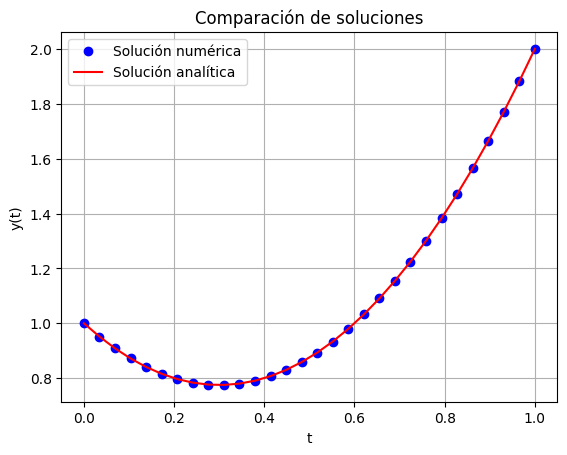

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número de puntos en el mallado
N = 30

# Crear el mallado
t = np.linspace(0, 1, N)

# Espaciado entre puntos
h = t[1] - t[0]

# Inicializar la matriz A y el vector b
A = np.zeros((N, N))
b = np.zeros(N)

# Llenar la matriz A y el vector b
for i in range(1, N-1):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1
    b[i] = 5 * h**2

# Aplicar condiciones de frontera
A[0, 0] = 1
b[0] = 1

A[N-1, N-1] = 1
b[N-1] = 2

# Resolver el sistema de ecuaciones
y_numerical = np.linalg.solve(A, b)

# Solución analítica
y_analytical = (5/2) * t**2 - (3/2) * t + 1

# Graficar ambas soluciones
plt.plot(t, y_numerical, 'bo', label='Solución numérica')
plt.plot(t, y_analytical, 'r-', label='Solución analítica')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación de soluciones')
plt.legend()
plt.grid(True)
plt.show()

# Malla eléctrico (Método de diferencias finitas)

## Solución Analítica

La ecuación diferencial se reescribe como:

$$
\frac{d^2V}{dx^2} + 2 \frac{dV}{dx} + 0.5 V = 5
$$

El término particular es $ V_p = 10 $ (constante).  
La parte homogénea se resuelve con $ e^{rx} $, dando:

$$
r^2 + 2r + 0.5 = 0
$$

Las raíces de la ecuación característica son:

$$
r = -1 \pm \frac{\sqrt{2}}{2}
$$

Por lo tanto, la solución general es:

$$
V(x) = C_1 e^{(-1 + \frac{\sqrt{2}}{2})x} + C_2 e^{(-1 - \frac{\sqrt{2}}{2})x} + 10
$$

Aplicando las condiciones de frontera:

1. $ V(0) = 50 $

$$
C_1 + C_2 + 10 = 50 \quad \Rightarrow \quad C_1 + C_2 = 40
$$

2. $ V(1) = 0 $

$$
C_1 e^{(-1 + \frac{\sqrt{2}}{2})} + C_2 e^{(-1 - \frac{\sqrt{2}}{2})} + 10 = 0
$$

Resolviendo para $ C_1 $ y $ C_2 $, obtenemos los coeficientes de la solución exacta.

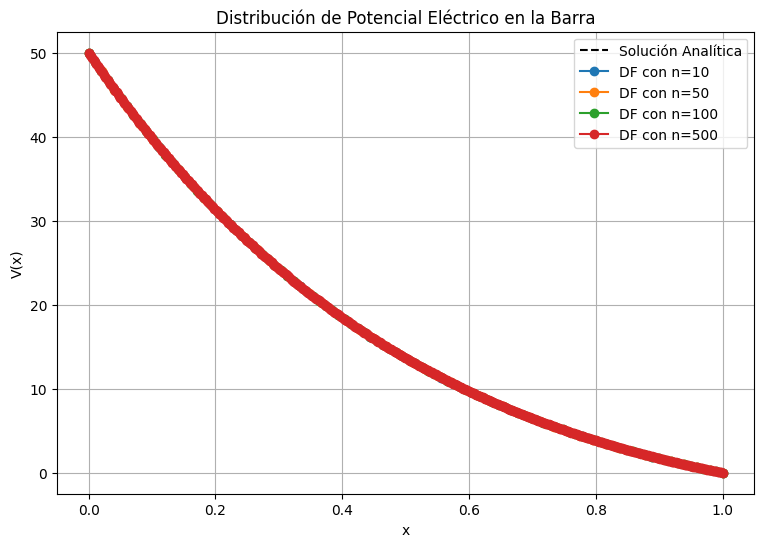

In [ ]:
def solve_analytic(x):
    r1 = -1 + np.sqrt(2)/2
    r2 = -1 - np.sqrt(2)/2
    # Sistema lineal para C1 y C2:
    #   C1 + C2 = 40
    #   C1 e^{r1} + C2 e^{r2} = -10
    A = np.array([
        [1, 1],
        [np.exp(r1), np.exp(r2)]
    ])
    b = np.array([40, -10])
    C1, C2 = np.linalg.solve(A, b)
    # Solución general:
    return C1*np.exp(r1*x) + C2*np.exp(r2*x) + 10

# -------------------------------------------------
# 2. Solución numérica por diferencias finitas
# -------------------------------------------------
# EDO: d^2V/dx^2 + 2 dV/dx + 0.5 V = 5
# Mallado: x en [0,1], n puntos => n-2 incógnitas internas.
# Usamos aproximaciones centradas:
#   d^2V/dx^2 ~ (V_{i-1} - 2V_i + V_{i+1}) / h^2
#   dV/dx     ~ (V_{i+1} - V_{i-1}) / (2h)
# => Se arma el sistema lineal para i = 1..n-2,
#    con V(0)=50 y V(n-1)=0 en la frontera.

def solve_finite_differences(n):
    # n = número total de puntos (incluyendo frontera)
    x = np.linspace(0, 1, n)
    h = 1/(n - 1)

    # Matriz A y vector b (tamaño n-2, para i=1..n-2)
    A = np.zeros((n-2, n-2))
    b = np.zeros(n-2)

    # Coeficientes (tras multiplicar por h^2):
    #   (V_{i-1} - 2V_i + V_{i+1}) + h(V_{i+1} - V_{i-1}) + 0.5 h^2 V_i = 5 h^2
    #   => (1 - h) V_{i-1} + (-2 + 0.5 h^2) V_i + (1 + h) V_{i+1} = 5 h^2
    #   i = 1..n-2
    #   Para i=1 => V_{0} = 50 es conocido
    #   Para i=n-2 => V_{n-1} = 0 es conocido

    alpha = (1 - h)      # coef. V_{i-1}
    beta  = (-2 + 0.5*h*h)  # coef. V_i
    gamma = (1 + h)      # coef. V_{i+1}
    rhs   = 5 * h*h      # término 5 h^2

    for i in range(1, n-1):  # i=1..n-2
        row = i - 1         # fila en la matriz (0..n-3)
        # Lado derecho
        b[row] = rhs
        # A(row, row) => coef de V_i
        A[row, row] = beta

        # V_{i-1} => si i=1, es frontera (V0=50); si no, es incógnita
        if i == 1:
            # i-1 = 0 => valor conocido => mover a b
            b[row] -= alpha * 50
        else:
            # i-1 = i-1 => desconocida => va a A
            A[row, row-1] = alpha

        # V_{i+1} => si i=n-2, es frontera (V_{n-1}=0); si no, es incógnita
        if i == n-2:
            # i+1 = n-1 => valor conocido => mover a b
            b[row] -= gamma * 0
        else:
            # i+1 = i+1 => desconocida => va a A
            A[row, row+1] = gamma

    # Resolvemos el sistema
    V_interior = np.linalg.solve(A, b)

    # Reconstruimos el vector solución completo
    V = np.zeros(n)
    V[0] = 50
    V[-1] = 0
    V[1:-1] = V_interior

    return x, V

# -------------------------------------------------
# 3. Comparación de resultados para distintos n
# -------------------------------------------------
mallados = [10, 50, 100, 500]
plt.figure(figsize=(9, 6))

# Solución analítica (para una malla densa de visualización)
x_dense = np.linspace(0, 1, 200)
V_exact = solve_analytic(x_dense)
plt.plot(x_dense, V_exact, 'k--', label='Solución Analítica')

# Solución por diferencias finitas para cada mallado
for n in mallados:
    x_num, V_num = solve_finite_differences(n)
    plt.plot(x_num, V_num, marker='o', linestyle='-', label=f'DF con n={n}')

plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Distribución de Potencial Eléctrico en la Barra')
plt.legend()
plt.grid(True)
plt.show()